In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta_0 = 0
        self.beta_1 = 0

    def fit(self, X, y):
        X, y = np.array(X).flatten(), np.array(y).flatten()
        n = len(X)

        for _ in range(self.iterations):
            y_pred = self.beta_0 + self.beta_1 * X
            gradient_beta_0 = (-2 / n) * np.sum(y - y_pred)
            gradient_beta_1 = (-2 / n) * np.sum(X * (y - y_pred))
            self.beta_0 -= self.learning_rate * gradient_beta_0
            self.beta_1 -= self.learning_rate * gradient_beta_1

    def predict(self, X):
        X = np.array(X).flatten()
        return self.beta_0 + self.beta_1 * X

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [6]:
def train_test_split(X, y, test_size=0.2):
    data_size = len(X)
    test_size = int(data_size * test_size)
    indices = np.random.permutation(data_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

Gradient Descent Model:
Intercept (beta_0): 28637.51306096613
Slope (beta_1): 8738.562326469842
MSE: 21610412.080083


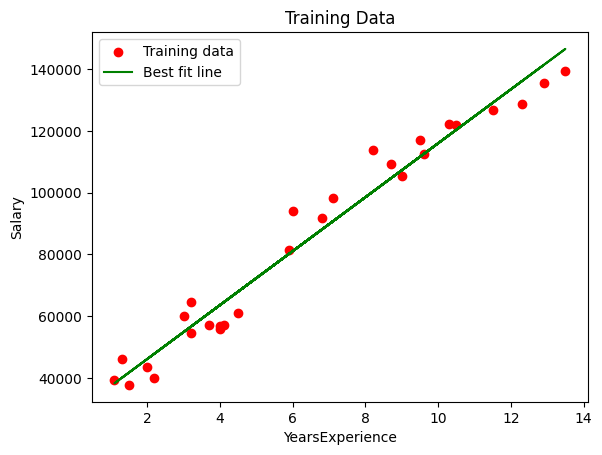

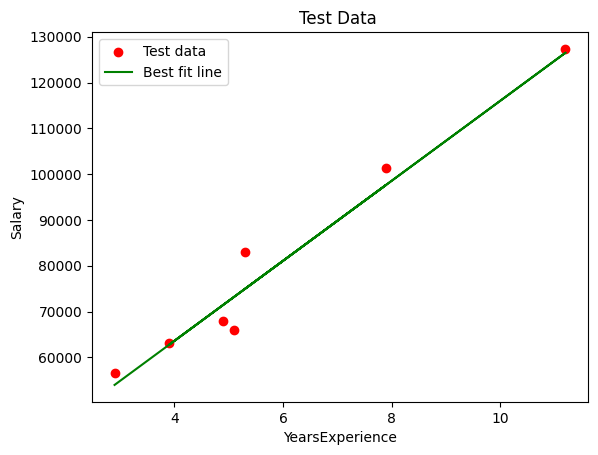

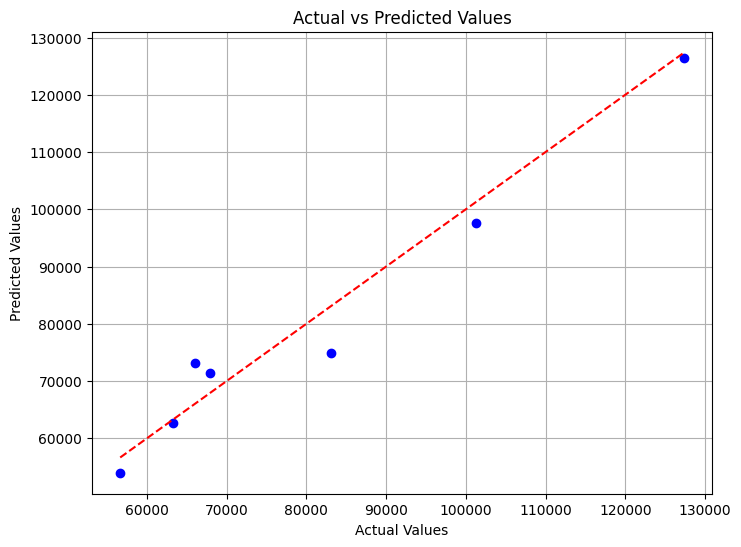

In [8]:
if __name__ == "__main__":

    df = pd.read_csv('/content/sample_data/Salary.csv')
    X = df['YearsExperience'].values
    y = df['Salary'].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    model = LinearRegressionGD(learning_rate=0.001, iterations=10000)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Performance metrics Output
    print("Gradient Descent Model:")
    print(f"Intercept (beta_0): {model.beta_0}")
    print(f"Slope (beta_1): {model.beta_1}")
    print("MSE:", model.mse(y_test, y_pred_test))

    # Plotting the best fit line for the Gradient Descent model
    plt.scatter(X_train, y_train, color='red', label='Training data')
    plt.plot(X_train, y_pred_train, color='green', label='Best fit line')
    plt.title('Training Data')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

    plt.scatter(X_test, y_test, color='red', label='Test data')
    plt.plot(X_test, y_pred_test, color='green', label='Best fit line')
    plt.title('Test Data ')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

    # Plotting Actual vs Predicted Values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()
